<div class="alert alert-block alert-success"><h3>IFN619 - Data Analytics for Strategic Decision Makers</h4></div>

# Lecture 02 :: Decision Analysis / Case Studies in Data Analytics

1. Motivation
2. The Data Analytics Process
3. Case Study: The Corona Virus
4. Optional Exercises


## Introduction: Data Analytics and the Business Concern

- Goal of data analytics: given a **business concern**, **augment human intelligence** using data and analytical techniques

- It is about converting data in a **meaningful way** so you can make a decision

<img src="images/data_analytics.png" />


- Data is a valuable resource that organizations should learn to extract and use to get additional information in order to make better decisions.

- Data is the “new economic currency”. Who has more, has the opportunity to gain market advantage

- However, the more data you collect, the more difficult it is for a human to get some understanding about it. The goal of this unit is to help you make the data more interpretable so you can act upon it!

## How to Approach a Data Science Case Study?

Case studies help students learn by immersing them in a real world business scenario where they act as problem solvers and decision-makers.

A case study must not merely summarize the case. It should identify **key features** and **key problems**. And also **outline** and **assess** alternative courses of action to deal with the problem you identify.

One can do this in four steps:

<img src="images/case_study.png" />




### Problem Discovery

- What is the business question?
- What is the context surrounding the question?
- Why is the answer relevant for the context?
- What opportunities emerge by addressing this question (business, social, technological)?
- Is the answer answerable and feasible?

### Identify Approach

- What methods were applied?
- What variables is the method going to deal with?
- Were the methods appropriate to address the question?
- Was the analysis well conducted?

### Identify Findings

- What were the findings?
- Are the findings statistically significant?
- How are the findings linked with methods?
- Are there potential issues with these findings?

### Analyse the Case

- What kind of analysis was made (business, social, technological)?
- Does the analysis answer the business question
- Were there any risks with the approach that was taken?
- Would you follow an alternative analysis to answer the question? Why?

## Case Study: The Corona Virus

A highly contagious virus has hit China and it is spreading fast, not only in mainland China, but also other countries accross the world. At the moment, the virus has spread accross Europe, Amnerica, Australia, Nz, and many other countries.

The World Health Organisation (WHO) wants to take some measures in order to slow down the spread of the virus, but they have no idea how to achive this. 

You have been called to analyse the latest reported data about the virus. Can you help the WHO and give them some insights based on the data that has been collected?


In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

### The Data Analytics Cycle

<img src="images/Data Analytics Decision Process.png" />



As a business analyst, we need to always keep in mind our business concern. It is our business concern that will guide our analysis.

- What is the **business question**?
- What is the **context** surrounding the question?
- Why is the answer **relevant** for the **context**?
- What **opportunities** (and challenges) emerge by addressing this question (business, social, technological)?
- Is the answer **answerable** and **feasible**?

For this case study, I will be interested in analysing the spread of the corona virus thoughout the world and how it affects people of different countries. Is there a reason to panic about this virus?

### Collect / Load Data

What data (or variables) do we need to address our business concern and where can we get them?

For this case study, I will make use of the following data:

- Corona virus dataset from 



In [650]:
# install library
!pip install folium

In [652]:
# import libraries
import numpy as np              # used for algebraic operations      
import pandas as pd             # used for data manipulation and data analysis
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns           # used for visualisations
 
from IPython.display import Markdown # used for visualisations
import plotly.graph_objs as go       # used for visualisations
import plotly.offline as py          # used for visualisations
from plotly.subplots import make_subplots # used for visualisations
import plotly.express as px          # used for visualisations
import pycountry                    # used for visualisations
import folium                        # used for visualisations
from folium import plugins           # used for visualisations
import json
plt.style.use('fivethirtyeight')        # setting the style in visualisations
plt.rcParams.update({'font.size': 14})  # setting the font size in visualisations

pd.set_option('display.max_rows', 250)  # maximum number of rows to display in a dataframe
pd.options.display.max_rows



250

In [459]:
# real-time updated datasets with information about
# COVID-19 confirmed cases
# COVID-19 related death cases
# COVID-19 related recovered cases
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

INDEX = "Country/Region"

# dataset with the number of confirmed COVID-19 cases accross the world
data_conf = pd.read_csv( url_confirmed, index_col=INDEX )

# dataset with the number of death related COVID-19 cases accross the world
data_deaths = pd.read_csv( url_deaths, index_col=INDEX )

# dataset with the number of recovered COVID-19 cases accross the world
data_recovered = pd.read_csv( url_recovered, index_col=INDEX )


In [463]:
data_conf

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,31.82570,117.2264,1,9,15,39,60,70,106,...,989,990,990,990,990,990,990,990,990,990
Mainland China,Beijing,40.18240,116.4142,14,22,36,41,68,80,91,...,410,410,411,413,414,414,418,418,422,426
Mainland China,Chongqing,30.05720,107.8740,6,9,27,57,75,110,132,...,576,576,576,576,576,576,576,576,576,576
Mainland China,Fujian,26.07890,117.9874,1,5,10,18,35,59,80,...,296,296,296,296,296,296,296,296,296,296
Mainland China,Gansu,36.06110,103.8343,0,2,2,4,7,14,19,...,91,91,91,91,91,91,91,102,119,120
Mainland China,Guangdong,23.34170,113.4244,26,32,53,78,111,151,207,...,1347,1348,1349,1349,1350,1350,1350,1351,1352,1352
Mainland China,Guangxi,23.82980,108.7881,2,5,23,23,36,46,51,...,252,252,252,252,252,252,252,252,252,252
Mainland China,Guizhou,26.81540,106.8748,1,3,3,4,5,7,9,...,146,146,146,146,146,146,146,146,146,146
Mainland China,Hainan,19.19590,109.7453,4,5,8,19,22,33,40,...,168,168,168,168,168,168,168,168,168,168


In [464]:
# taking a quick look at the data
data_deaths

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,31.82570,117.2264,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Mainland China,Beijing,40.18240,116.4142,0,0,0,0,0,1,1,...,5,7,8,8,8,8,8,8,8,8
Mainland China,Chongqing,30.05720,107.8740,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Mainland China,Fujian,26.07890,117.9874,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Mainland China,Gansu,36.06110,103.8343,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Mainland China,Guangdong,23.34170,113.4244,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
Mainland China,Guangxi,23.82980,108.7881,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Mainland China,Guizhou,26.81540,106.8748,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Mainland China,Hainan,19.19590,109.7453,0,0,0,0,0,1,1,...,5,5,5,5,5,5,5,6,6,6


In [465]:
# taking a quick look at the data
data_recovered

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,31.82570,117.2264,0,0,0,0,0,0,0,...,792,821,868,873,917,936,956,970,979,979
Mainland China,Beijing,40.18240,116.4142,0,0,1,2,2,2,4,...,248,257,271,276,282,288,297,297,299,303
Mainland China,Chongqing,30.05720,107.8740,0,0,0,0,0,0,0,...,401,422,438,450,469,490,502,512,513,526
Mainland China,Fujian,26.07890,117.9874,0,0,0,0,0,0,0,...,228,235,243,247,255,260,270,277,284,295
Mainland China,Gansu,36.06110,103.8343,0,0,0,0,0,0,0,...,81,82,82,84,85,86,87,87,87,87
Mainland China,Guangdong,23.34170,113.4244,0,2,2,2,2,4,4,...,890,935,983,1016,1059,1101,1133,1181,1216,1237
Mainland China,Guangxi,23.82980,108.7881,0,0,0,0,0,0,2,...,161,168,176,181,192,202,210,214,217,218
Mainland China,Guizhou,26.81540,106.8748,0,0,0,0,0,0,0,...,112,112,112,112,114,114,114,114,114,115
Mainland China,Hainan,19.19590,109.7453,0,0,0,0,0,0,0,...,131,133,148,149,151,155,158,158,158,158


Looking at the dataset, it seems that the number of rows correspond to the pair Country / State where it was reported a confirmed case, a recovered case or a death related case of COVID-19

The columns have information about the geographic codes where COVID-19 has been found and it has the overall number of confirmed cases, deaths and recovered cases **per day** since the **22nd of January of 2020**.

For curiosity, this type of arrangement of data in a dataset is called a **time series**. This kind of format is very used in finance / economic data analytics problems.

In [467]:
# general information about the dataset
num_states = data_conf.shape[0]
num_days = data_conf.shape[1] - 3 # removing the columns without time information

# get the column names out of your dataset
column_info = data_conf.columns

# get information about the first date where the virus has been reported
start_date = column_info[3]

# get information about the last date where the virus has been reported
end_date = column_info[-1] # the -1 index represents the END of a list

print("There are %d regions where COVID-19 has been confirmed" %num_states )
print("The evolution of confirmed cases is reported throughout %d days with\nStart Date: %s\nEnd Date: %s" %(num_days, start_date, end_date))



There are 225 regions where COVID-19 has been confirmed
The evolution of confirmed cases is reported throughout 46 days with
Start Date: 1/22/20
End Date: 3/7/20


### Data Cleaning / Preprocessing

In [468]:
# Lets check the total #Countries affected by nCoV

list_countries = data_conf.index.unique().tolist()
print('\n')
print(list_countries)
print("\n------------------------------------------------------------------")
print("\nTotal countries affected by nCoV: ",len(list_countries))



['Mainland China', 'Thailand', 'Japan', 'South Korea', 'Taiwan', 'US', 'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France', 'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates', 'Philippines', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia', 'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', 'Belarus', 'Iceland', 'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint Barthelemy', 'Hungary', 'Faroe Islands', 'Gibraltar', 'Liechtenstein',

In [469]:
# let's rename "Mainland China" to just "China"
data_conf.index = np.where(data_conf.index == 'Mainland China', 
                                       'China', 
                                       data_conf.index)

data_deaths.index = np.where(data_deaths.index == 'Mainland China', 
                                       'China', 
                                       data_deaths.index)

data_recovered.index = np.where(data_recovered.index == 'Mainland China', 
                                       'China', 
                                       data_recovered.index)

In [470]:
# Check the # countries again
nCoV_Countries = data_conf.index.unique().tolist()
print('\n')
print(nCoV_Countries)
print("\n------------------------------------------------------------------")
print("\nTotal countries affected by COVID-19: ",len(nCoV_Countries))



['China', 'Thailand', 'Japan', 'South Korea', 'Taiwan', 'US', 'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France', 'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates', 'Philippines', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia', 'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', 'Belarus', 'Iceland', 'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint Barthelemy', 'Hungary', 'Faroe Islands', 'Gibraltar', 'Liechtenstein', 'Poland'

**Exploring Some Data Quaility Techniques with Python**


When using dataframes, a very useful function that gives you a full overview of your dataset is *info()*


In [293]:
# one can see that there are missing values in the column "Province/State"
# Do you think this is problematic for our analysis?
data_conf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, China to US
Data columns (total 49 columns):
Province/State    131 non-null object
Lat               225 non-null float64
Long              225 non-null float64
1/22/20           225 non-null int64
1/23/20           225 non-null int64
1/24/20           225 non-null int64
1/25/20           225 non-null int64
1/26/20           225 non-null int64
1/27/20           225 non-null int64
1/28/20           225 non-null int64
1/29/20           225 non-null int64
1/30/20           225 non-null int64
1/31/20           225 non-null int64
2/1/20            225 non-null int64
2/2/20            225 non-null int64
2/3/20            225 non-null int64
2/4/20            225 non-null int64
2/5/20            225 non-null int64
2/6/20            225 non-null int64
2/7/20            225 non-null int64
2/8/20            225 non-null int64
2/9/20            225 non-null int64
2/10/20           225 non-null int64
2/11/20           225 non-null int64
2/12

In Pandas missing data is represented by two value:

- *None*
- *NaN (Not a Number)*

Pandas treats *None* and *NaN* for indicating **missing or null values**. To facilitate this convention, there are several useful functions for **detecting**, **removing**, and **replacing** null values in Pandas DataFrame:

- isnull()
- notnull()
- dropna()
- fillna()
- replace()
- interpolate()

In [294]:
# one can display the rows to the dataset where the "Province/State" is NULL

# for the confirmed cases
null_entries_conf = pd.isnull(data_conf["Province/State"]) 
data_conf[null_entries_conf]

# the death related cases
null_entries_deaths = pd.isnull(data_conf["Province/State"]) 
data_deaths[null_entries_deaths]

# the recovered cases
null_entries_recs = pd.isnull(data_conf["Province/State"]) 
data_recovered[null_entries_recs]


,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20
Thailand,NaN,15.0000,101.0000,0,0,0,0,2,2,5,...,22,28,28,28,31,31,31,31,31,31
Japan,NaN,36.0000,138.0000,0,0,0,0,1,1,1,...,22,22,32,32,32,43,43,43,46,76
South Korea,NaN,36.0000,128.0000,0,0,0,0,0,0,0,...,22,22,27,30,30,30,41,41,135,135
Singapore,NaN,1.2833,103.8333,0,0,0,0,0,0,0,...,62,62,72,72,78,78,78,78,78,78
Vietnam,NaN,16.0000,108.0000,0,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
France,NaN,47.0000,2.0000,0,0,0,0,0,0,0,...,11,11,12,12,12,12,12,12,12,12
Nepal,NaN,28.1667,84.2500,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Malaysia,NaN,2.5000,112.5000,0,0,0,0,0,0,0,...,18,18,18,18,18,22,22,22,22,23
Cambodia,NaN,11.5500,104.9167,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Sri Lanka,NaN,7.0000,81.0000,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [295]:
# one can also ask the opposite question and check the information of NON-NULL entries
not_null_entries = pd.notnull(data_conf["Province/State"]) 

data_conf[not_null_entries]

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20
China,Anhui,31.82570,117.2264,1,9,15,39,60,70,106,...,989,990,990,990,990,990,990,990,990,990
China,Beijing,40.18240,116.4142,14,22,36,41,68,80,91,...,410,410,411,413,414,414,418,418,422,426
China,Chongqing,30.05720,107.8740,6,9,27,57,75,110,132,...,576,576,576,576,576,576,576,576,576,576
China,Fujian,26.07890,117.9874,1,5,10,18,35,59,80,...,296,296,296,296,296,296,296,296,296,296
China,Gansu,36.06110,103.8343,0,2,2,4,7,14,19,...,91,91,91,91,91,91,91,102,119,120
China,Guangdong,23.34170,113.4244,26,32,53,78,111,151,207,...,1347,1348,1349,1349,1350,1350,1350,1351,1352,1352
China,Guangxi,23.82980,108.7881,2,5,23,23,36,46,51,...,252,252,252,252,252,252,252,252,252,252
China,Guizhou,26.81540,106.8748,1,3,3,4,5,7,9,...,146,146,146,146,146,146,146,146,146,146
China,Hainan,19.19590,109.7453,4,5,8,19,22,33,40,...,168,168,168,168,168,168,168,168,168,168
China,Hebei,38.04280,114.5149,1,1,2,8,13,18,33,...,317,318,318,318,318,318,318,318,318,318


In order to fill null values in a datasets, we use the functions *fillna()*, *dropna()* or *interpolate()*. 

These functions replace NaN values with some value of their own.

- **fillna()** fucntion basically hard-codes a value to replace the NaN entries. It is used for simpler datasets with few missing entries (like in this lecture).

- **interpolate()** function is basically used to fill NA values in the dataframe but it uses various interpolation techniques to fill the missing values rather than hard-coding the value. This method uses **statistical estimations** based on the distribution of the data. This is an advanced method that you might be interested in exploring in your tutorials or in your assignments if you are dealing with a complex dataset

- **dropna()** function basically drops either a row or a column. This is usually applied for datasets where there are variables that have **too many missing entries** and it is not possible to estimate them or to hand-code them


In [296]:
# let's fill the NaN columns with "Not Specified"

# filling a null values using fillna() for the confirmed cases
data_conf.fillna("Not Specified", inplace = True)  

# filling a null values using fillna() for the confirmed cases
data_deaths.fillna("Not Specified", inplace = True)  

# filling a null values using fillna() for the confirmed cases
data_recovered.fillna("Not Specified", inplace = True)  


In [297]:
# one can double check if this worked
data_conf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, China to US
Data columns (total 49 columns):
Province/State    225 non-null object
Lat               225 non-null float64
Long              225 non-null float64
1/22/20           225 non-null int64
1/23/20           225 non-null int64
1/24/20           225 non-null int64
1/25/20           225 non-null int64
1/26/20           225 non-null int64
1/27/20           225 non-null int64
1/28/20           225 non-null int64
1/29/20           225 non-null int64
1/30/20           225 non-null int64
1/31/20           225 non-null int64
2/1/20            225 non-null int64
2/2/20            225 non-null int64
2/3/20            225 non-null int64
2/4/20            225 non-null int64
2/5/20            225 non-null int64
2/6/20            225 non-null int64
2/7/20            225 non-null int64
2/8/20            225 non-null int64
2/9/20            225 non-null int64
2/10/20           225 non-null int64
2/11/20           225 non-null int64
2/12

### Analysis & Visualisation

Let's analyse the distribution of Confirmed, Deaths, Recovered cases on every day basis starting from 22nd Jan 2019

So far, the analysis showed that our data is cummulative: the cases confirmed in a specific day will be propagated (or accumulated) to the next day and so on. So this distribution is always growing. This is obvious and can show us how much it is growing. 

In [492]:
# the data is cummulative. We can group the information by country by getting 
# the last value reported in the data, in order to get more realistic values
confirmed_cases_per_day = data_conf.iloc[:,3:].groupby(data_conf.index).last()
death_cases_per_day = data_deaths.iloc[:,3:].groupby(data_deaths.index).last()
recov_cases_per_day = data_recovered.iloc[:,3:].groupby(data_recovered.index).last()

# let's take a look at the confirmed cases
confirmed_cases_per_day

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Algeria,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,3,5,12,12,17,17
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,2,8
Armenia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
Australia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Austria,0,0,0,0,0,0,0,0,0,0,...,3,3,9,14,18,21,29,41,55,79
Azerbaijan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,3,3,3,6,6,9
Bahrain,0,0,0,0,0,0,0,0,0,0,...,33,36,41,47,49,49,52,55,60,85
Belarus,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,6,6,6,6


Text(0.5, 1.0, 'Distribution of total confirmed cases of COVID-19 on every day basis starting from 22nd Jan')

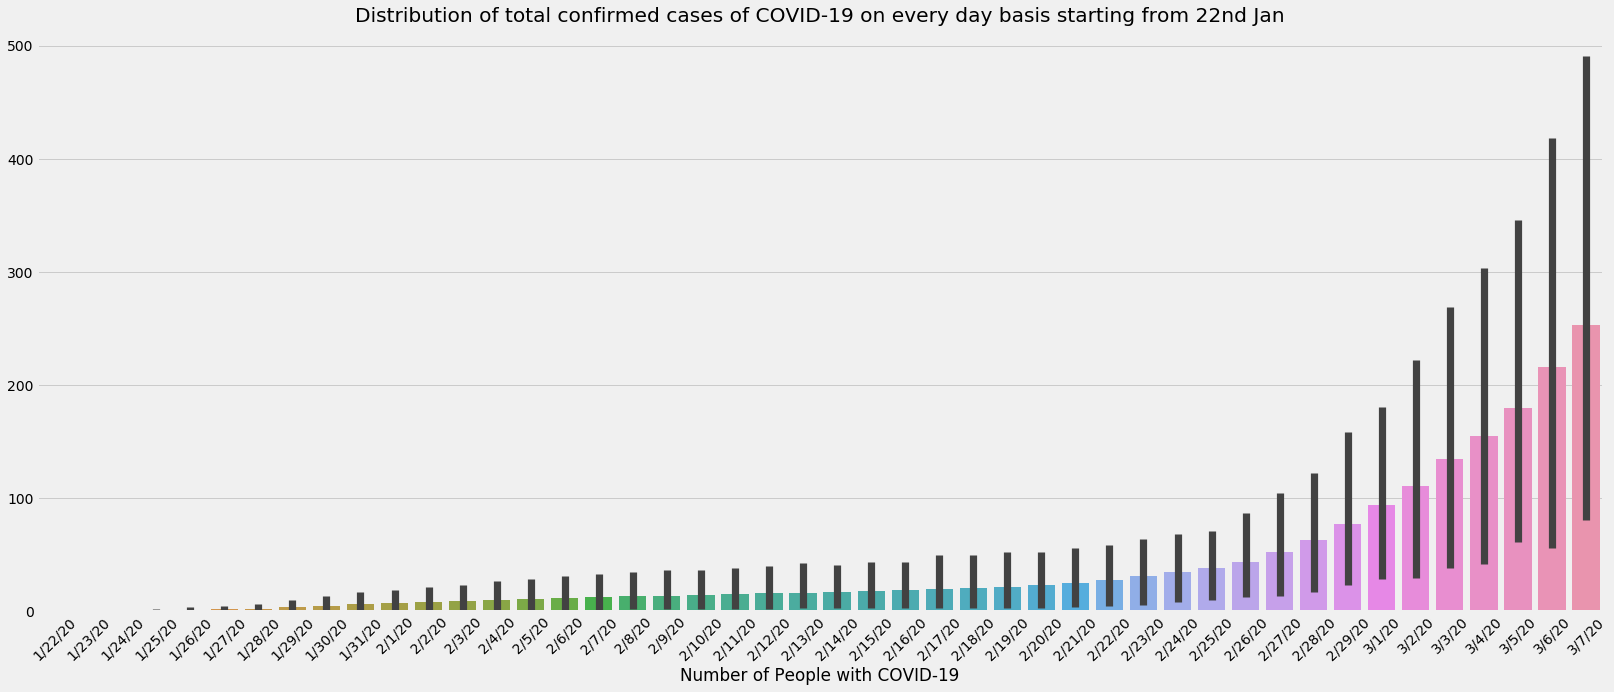

In [493]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)

sns.barplot(  data = confirmed_cases_per_day)
ax.set_xticklabels( confirmed_cases_per_day , rotation=45 )
plt.xlabel("Date")
plt.xlabel("Number of People with COVID-19")
plt.title('Distribution of total confirmed cases of COVID-19 on every day basis starting from 22nd Jan')


One can notice that the distribution of dead people is shifted compared with the number of confirmed cases: almost 1 month later the start of the virus, one starts to notice significant numbers of deaths

Text(0.5, 1.0, 'Distribution of total people who died because of COVID-19 on every day basis starting from 22nd Jan')

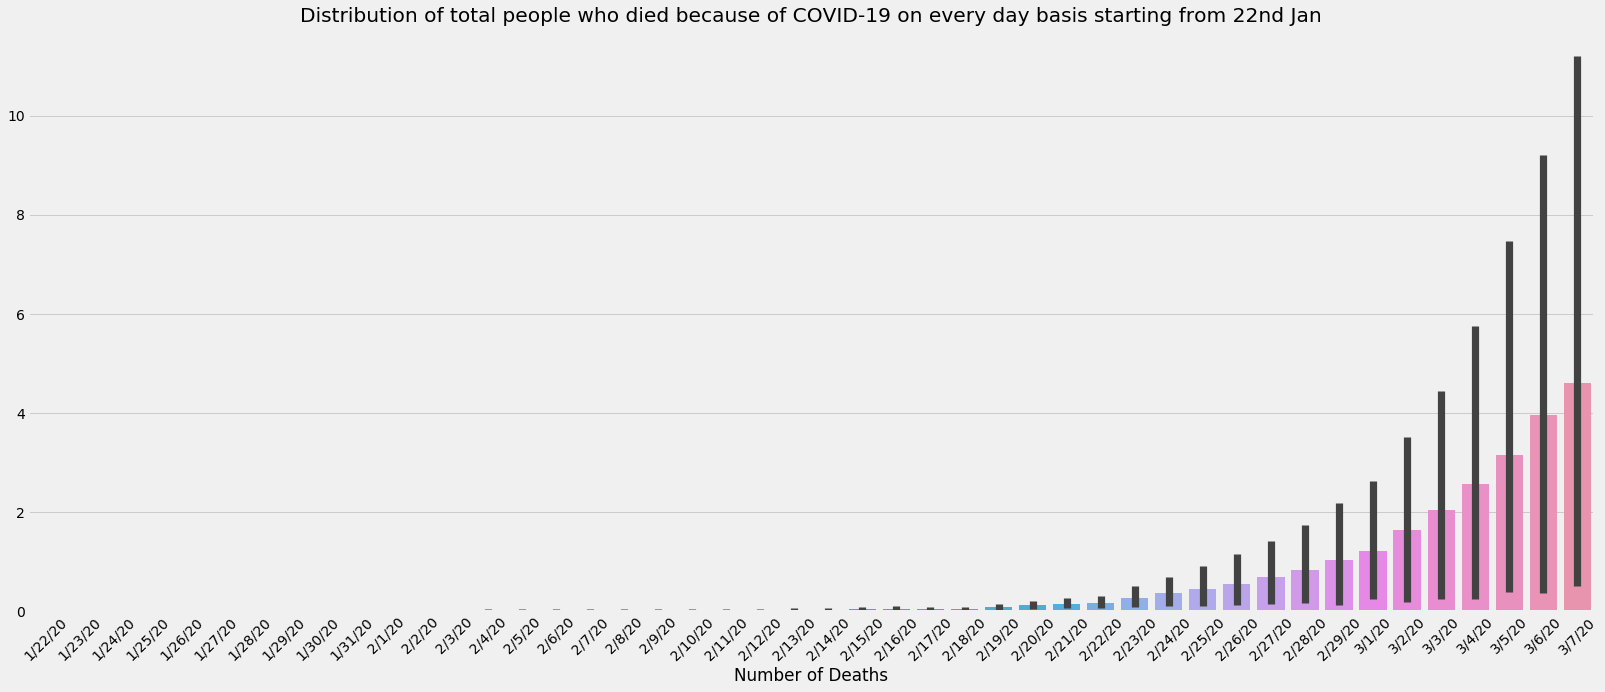

In [494]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)

sns.barplot(  data = death_cases_per_day)
ax.set_xticklabels( death_cases_per_day , rotation=45 )
plt.xlabel("Date")
plt.xlabel("Number of Deaths")
plt.title('Distribution of total people who died because of COVID-19 on every day basis starting from 22nd Jan')


Regarding the number of recovered cases, one can see that after 2 / 3 weeks, one can already see a significant amount of poeple recovering from the virus



Text(0.5, 1.0, 'Distribution of total people who recovered from COVID-19 on every day basis starting from 22nd Jan')

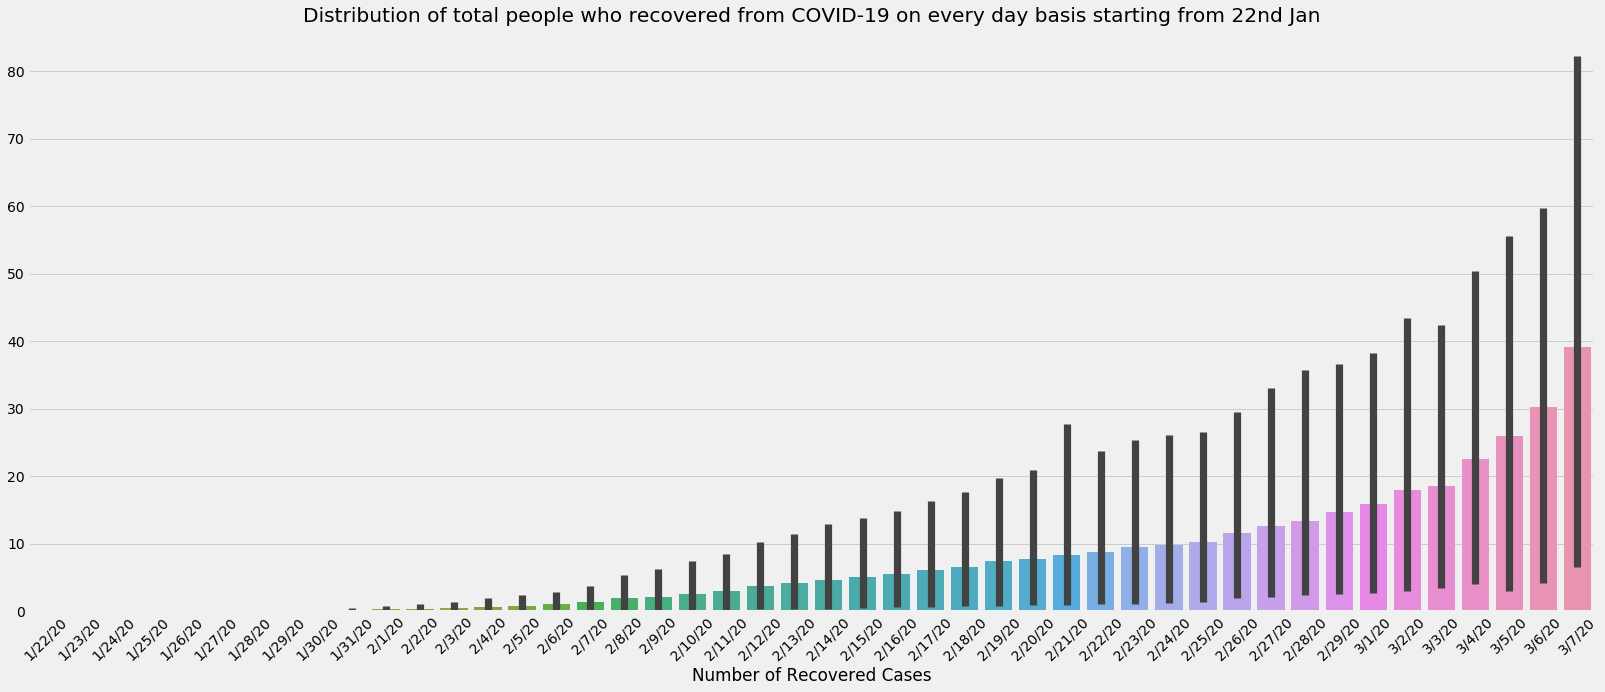

In [495]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)

sns.barplot(  data = recov_cases_per_day)
ax.set_xticklabels( recov_cases_per_day , rotation=45 )
plt.xlabel("Date")
plt.xlabel("Number of Recovered Cases")
plt.title('Distribution of total people who recovered from COVID-19 on every day basis starting from 22nd Jan')


Text(0.5, 1.0, 'Number of Confirmed cases per country')

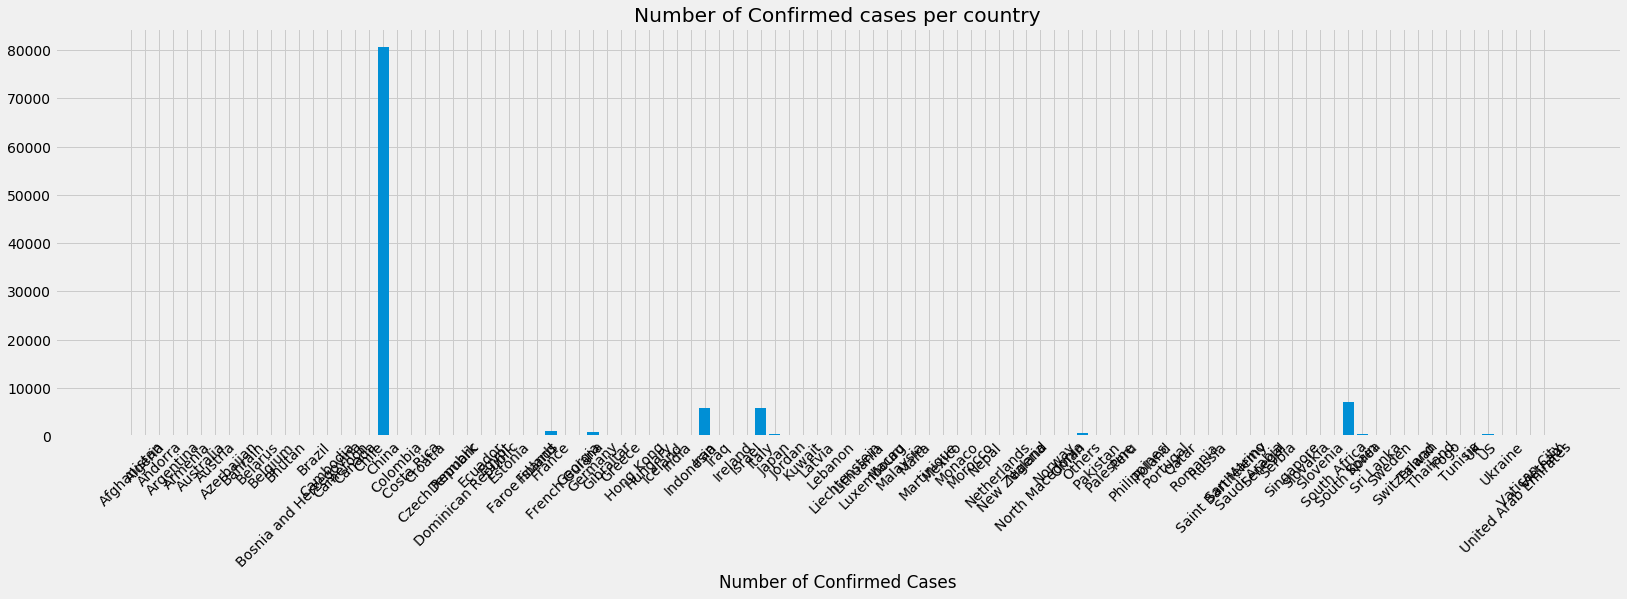

In [528]:
# let's check the impact of the virus by country
conf_cases = data_conf.groupby(data_conf.index).sum()
conf_cases_per_country = conf_cases.iloc[:,-1]

# let's look at countries with more than 100 cases, only
#conf_cases_per_country = conf_cases_per_country[ conf_cases_per_country > 100 ]

x = conf_cases_per_country.index.tolist()
y = conf_cases_per_country.tolist()

fig = plt.figure(figsize=(25,7))
ax = plt.axes()

plt.bar(x, y)
ax.set_xticklabels( x , rotation=45 )
plt.xlabel("Date")
plt.xlabel("Number of Confirmed Cases")
plt.title('Number of Confirmed cases per country')


In [590]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# confirmed cases
country = "China"
conf_cases = data_conf.groupby(data_conf.index).sum()
country_conf = conf_cases.iloc[:,3:].loc[country]

# recovered cases
recov_cases = data_recovered.groupby(data_recovered.index).sum()
country_recov = recov_cases.iloc[:,3:].loc[country]

# death cases
death_cases = data_deaths.groupby(data_deaths.index).sum()
country_death = death_cases.iloc[:,3:].loc[country]

# visualisation 
plot = make_subplots(rows=1, cols=3, subplot_titles=("Confirmed", "Recovered", "Deaths"))

subPlot1 = go.Scatter(x = country_conf.index.tolist(),
                      y = country_conf.tolist(),
                      name="Confirmed",
                      line_color='orange',
                      opacity=0.8)

subPlot2 = go.Scatter(x = country_recov.index.tolist(),
                      y = country_recov.tolist(),
                      name="Recovered",
                      line_color='green',
                      opacity=0.8)

subPlot3 = go.Scatter(x = country_death.index.tolist(),
                      y = country_death,
                      name="Deaths",
                      line_color='red',
                      opacity=0.8)


plot.append_trace(subPlot1, 1, 1)
plot.append_trace(subPlot2, 1, 2)
plot.append_trace(subPlot3, 1, 3)
plot.update_layout(template="ggplot2", title_text = '<b>Spread of the nCov Over Time in %s</b>' %country)


One interesting aspect in pandemics is that the propagation of a virus tends to follow what it is known as a sigmoid function (or an S shaped function). One can antually see thar in China the shape is no longer in exponencial growth and is starting to stabilize.

In [598]:
# confirmed cases
country = "Australia"
conf_cases = data_conf.groupby(data_conf.index).sum()
country_conf = conf_cases.iloc[:,3:].loc[country]

# recovered cases
recov_cases = data_recovered.groupby(data_recovered.index).sum()
country_recov = recov_cases.iloc[:,3:].loc[country]

# death cases
death_cases = data_deaths.groupby(data_deaths.index).sum()
country_death = death_cases.iloc[:,3:].loc[country]

# visualisation 
plot = make_subplots(rows=1, cols=3, subplot_titles=("Confirmed", "Recovered", "Deaths"))

subPlot1 = go.Scatter(x = country_conf.index.tolist(),
                      y = country_conf.tolist(),
                      name="Confirmed",
                      line_color='orange',
                      opacity=0.8)

subPlot2 = go.Scatter(x = country_recov.index.tolist(),
                      y = country_recov.tolist(),
                      name="Recovered",
                      line_color='green',
                      opacity=0.8)

subPlot3 = go.Scatter(x = country_death.index.tolist(),
                      y = country_death,
                      name="Deaths",
                      line_color='red',
                      opacity=0.8)


plot.append_trace(subPlot1, 1, 1)
plot.append_trace(subPlot2, 1, 2)
plot.append_trace(subPlot3, 1, 3)
plot.update_layout(template="ggplot2", title_text = '<b>Spread of the nCov Over Time in %s</b>' %country)


**TODO**

Can you group the data into "China" and Other "Countries" and make a single plot with the confirmed, recovered, and death cases of CovID-19?

**TODO**
 Can you make an analysis between all the different regions in China nad see how the virus is propagating there?

### Geographical Analysis

An interesting analysis is to see how the virus propagates throughout the world.
Python has some libraries that can assist us on making some geographical analysis. One of these packages is *folium*

In [615]:
# create a dataframe with the following information: 
# Country, 
# Latitude, 
# Longitude, 
# NumConfirmed cases
# NumRecovered cases
# NumDeaths

last_date = conf_cases.columns[-1]
conf_cases_geo = conf_cases[["Lat", "Long", last_date]]

# we can rename the last column as "Confirmed Cases"
cases_geo = conf_cases_geo.rename(columns={last_date: "Confirmed Cases"})

# we can also add the information about the number of recovered cases and deaths
cases_geo['Recovered Cases'] =  recov_cases[last_date]
cases_geo['Death Cases'] =  death_cases[last_date]
cases_geo

,Lat,Long,Confirmed Cases,Recovered Cases,Death Cases
Afghanistan,33.00000,65.0000,1,0,0
Algeria,28.03390,1.6596,17,0,0
Andorra,42.50630,1.5218,1,0,0
Argentina,-38.41610,-63.6167,8,0,0
Armenia,40.06910,45.0382,1,0,0
Australia,-185.05230,1120.4879,63,21,2
Austria,47.51620,14.5501,79,0,0
Azerbaijan,40.14310,47.5769,9,0,0
Bahrain,26.02750,50.5500,85,4,0
Belarus,53.70980,27.9534,6,0,0


In [616]:
# One can use Python folium to generate geographic visualisations
WorldMap = folium.Map(location=[0,0], zoom_start=1.5,tiles='cartodbpositron')
WorldMap

In [649]:
for lat, long, confirmed, recovered, deaths, country in zip(cases_geo['Lat'],
                                                           cases_geo['Long'],
                                                           cases_geo['Confirmed Cases'],
                                                           cases_geo['Recovered Cases'],
                                                           cases_geo['Death Cases'], 
                                                           cases_geo.index.tolist()):
        if (deaths == 0):
            folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                               '<strong>Country:</strong> ' + str(country).capitalize() + '<br>'
                               '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                               '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                               '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='darkblue',icon='info-sign'), color='rgb(55, 83, 109)'
                    , tooltip = str(country).capitalize(), fill_color='rgb(55, 83, 109)').add_to(WorldMap)

        else:
            folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                               '<strong>Country:</strong> ' + str(country).capitalize() + '<br>'
                               '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                               '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                               '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='red', icon='info-sign'), color='rgb(26, 118, 255)'
                    , tooltip = str(country).capitalize(), fill_color='rgb(26, 118, 255)').add_to(WorldMap)
        
WorldMap


In [664]:
# analysing only China

china_cases = data_conf.loc["China"][["Lat", "Long", "Province/State", last_date]]
china_cases = china_cases.rename(columns={last_date: "Confirmed Cases"})

# add the numbers of deaths and recovered cases
china_cases['Recovered Cases'] =  data_recovered.loc["China"][last_date]
china_cases['Death Cases'] =  data_deaths.loc["China"][last_date]
china_cases

,Lat,Long,Province/State,Confirmed Cases,Recovered Cases,Death Cases
China,31.82570,117.2264,Anhui,990,979,6
China,40.18240,116.4142,Beijing,426,303,8
China,30.05720,107.8740,Chongqing,576,526,6
China,26.07890,117.9874,Fujian,296,295,1
China,36.06110,103.8343,Gansu,120,87,2
China,23.34170,113.4244,Guangdong,1352,1237,7
China,23.82980,108.7881,Guangxi,252,218,2
China,26.81540,106.8748,Guizhou,146,115,2
China,19.19590,109.7453,Hainan,168,158,6
China,38.04280,114.5149,Hebei,318,307,6


In [648]:
china_lat = 35.8617
china_lon = 104.1954


ChinaMap = folium.Map(location=[china_lat, china_lon], zoom_start=4, tiles='cartodbpositron')

for lat, long, confirmed, deaths, recovered, state in zip(china_cases['Lat'],
                                                           china_cases['Long'],
                                                           china_cases['Confirmed Cases'],
                                                           china_cases['Death Cases'],
                                                           china_cases['Recovered Cases'], 
                                                           china_cases['Province/State']):
    
    if (deaths == 0):
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                                 '<strong>State:</strong> ' + str(state).capitalize() + '<br>'
                                 '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                                 '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                                 '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='darkblue',icon='info-sign'), color='rgb(55, 83, 109)'
                    , tooltip = str(state).capitalize(), fill_color='rgb(55, 83, 109)').add_to(ChinaMap)
    else:
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                                 '<strong>State:</strong> ' + str(state).capitalize() + '<br>'
                                 '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                                 '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                                 '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='red', icon='info-sign'), color='rgb(26, 118, 255)'
                    , tooltip = str(state).capitalize(), fill_color='rgb(26, 118, 255)').add_to(ChinaMap)
    
    
ChinaMap


In [668]:
# Analysing virus recovery and death rate in China
# Remeber that China has a total population of 1380000000
# 80000 cases have been reported, which corresponds to 0.0058% of the population
china_cases["% Recovered"] =  100*(china_cases["Recovered Cases"] / china_cases["Confirmed Cases"])
china_cases["% Death"] =  100*(china_cases["Death Cases"] / china_cases["Confirmed Cases"])
china_cases[["Province/State","% Recovered", "% Death"]]


,Province/State,% Recovered,% Death
China,Anhui,98.888889,0.606061
China,Beijing,71.126761,1.877934
China,Chongqing,91.319444,1.041667
China,Fujian,99.662162,0.337838
China,Gansu,72.500000,1.666667
China,Guangdong,91.494083,0.517751
China,Guangxi,86.507937,0.793651
China,Guizhou,78.767123,1.369863
China,Hainan,94.047619,3.571429
China,Hebei,96.540881,1.886792


In [687]:
avg_rec_rate = np.mean(china_cases["% Recovered"])
print("Average recovery rate is %.2f%%" %avg_rec_rate)

avg_death_rate = np.mean(china_cases["% Death"])
print("Average death rate is %.2f%%" %avg_death_rate)


Average recovery rate is 90.59%
Average death rate is 1.17%


### Business Insights

With this analysis, we found the following:

- COVID-19 is a highly contagious virus, which has already propagated to 102 countries in just 3 months.
- Although it is highly contagious, the analysis of the Chinese data (the most representative), shows that the recovery rate is quite high (around 90%) and the death rate so far is just (1.17%). 
- These results should only be used as a mere indication given that the data reports about China might be hidden due to political reasons
- Data shows, as expected, the sigmoid tendency of the propagation of the virus. In China, it seems the virus is no longer in exponential phase and is slowly stabilizing.
- Panic in current population might be due to the effects of media and the fact that information was attempted to be hidden from the public (remember the Spanish flu)
- This panic in population can also be an effect of **negative bias** where people tend to put more weight on the occurence of negative events, even if the chance of those negative events happening is very low.
- These insights should not ignore the severity of the virus. Higiene measures, quarantines, traveling control and a healthy diet are advised to slowdown the virus.